# Uncertainty estimation for regression tasks

Goal: Estimate uncertainty for regression task, using Boston Housing Prices Dataset.

Run three experiments:

* Train and evaluate small regression model using MSE loss
* Train and evaluate small regression model using NLL (negative log-likelihood) loss
* Train and evaluate small regression model using NLL loss and Monte-Carlo dropout

[Monte Carlo dropout](https://arxiv.org/abs/1506.02142) is a sampling-based method for estimating model uncertainties.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Download dataset:

In [2]:
train_data, test_data = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

Normalize data:

In [3]:
x_train_orig, y_train = train_data
x_test_orig, y_test = test_data

scaler = StandardScaler()
scaler.fit(x_train_orig)

x_train = scaler.transform(x_train_orig)
x_test = scaler.transform(x_test_orig)

In [4]:
def callback_factory():
    reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20)
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=2,
                                                               restore_best_weights=True)
    return [reduce_lr_callback, early_stopping_callback]

## Build and train standard regression model

In [5]:
def build_standard_regression_model():
    inputs = tf.keras.Input(shape=(x_train.shape[-1],))
    x = layers.Dense(15, activation='tanh')(inputs)
    x = layers.Dropout(0.1)(x)
    regression_output = layers.Dense(1, activation=None)(x)
    
    return tf.keras.Model(inputs=inputs, outputs=regression_output)
    
standard_model = build_standard_regression_model()

standard_model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2))
standard_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                210       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [6]:
history_standard = standard_model.fit(
    x=x_train,
    y=y_train,
    epochs=1000,
    callbacks=callback_factory(),
    validation_data=(x_test, y_test)
)

Epoch 1/1000
13/13 [==============================] - 1s 21ms/step - loss: 570.2971 - val_loss: 554.8249
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 484.2777 - val_loss: 503.7732
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 456.6900 - val_loss: 449.6431
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 409.4446 - val_loss: 389.6209
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 350.4877 - val_loss: 328.6029
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 305.8089 - val_loss: 268.2297
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 229.5321 - val_loss: 212.8997
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 209.9498 - val_loss: 165.3721
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 158.4612 - val_loss: 131.2460
Epoch 10/1000
13/13 [==============================] - 0s 3ms/s

13/13 [==============================] - 0s 3ms/step - loss: 19.4910 - val_loss: 15.5083
Epoch 81/1000
13/13 [==============================] - 0s 2ms/step - loss: 18.7143 - val_loss: 15.0565
Epoch 82/1000
13/13 [==============================] - 0s 3ms/step - loss: 23.0004 - val_loss: 17.6248
Epoch 83/1000
13/13 [==============================] - 0s 3ms/step - loss: 20.4511 - val_loss: 15.9469
Epoch 84/1000
13/13 [==============================] - 0s 3ms/step - loss: 17.7966 - val_loss: 17.0912
Epoch 85/1000
13/13 [==============================] - 0s 3ms/step - loss: 16.9635 - val_loss: 14.6108
Epoch 86/1000
13/13 [==============================] - 0s 2ms/step - loss: 19.1721 - val_loss: 16.3596
Epoch 87/1000
13/13 [==============================] - 0s 3ms/step - loss: 17.9849 - val_loss: 14.7211
Epoch 88/1000
13/13 [==============================] - 0s 3ms/step - loss: 21.2261 - val_loss: 14.8436
Epoch 89/1000
13/13 [==============================] - 0s 2ms/step - loss: 21.9414 - va

13/13 [==============================] - 0s 2ms/step - loss: 17.1575 - val_loss: 12.9094
Epoch 160/1000
13/13 [==============================] - 0s 3ms/step - loss: 17.9746 - val_loss: 14.0299
Epoch 161/1000
13/13 [==============================] - 0s 3ms/step - loss: 18.0705 - val_loss: 12.5097
Epoch 162/1000
13/13 [==============================] - 0s 3ms/step - loss: 19.2818 - val_loss: 14.4927
Epoch 163/1000
13/13 [==============================] - 0s 2ms/step - loss: 18.6267 - val_loss: 14.4260
Epoch 164/1000
13/13 [==============================] - 0s 3ms/step - loss: 22.2891 - val_loss: 13.0858
Epoch 165/1000
13/13 [==============================] - 0s 3ms/step - loss: 21.2312 - val_loss: 13.0684
Epoch 166/1000
13/13 [==============================] - 0s 3ms/step - loss: 17.3107 - val_loss: 13.9813
Epoch 167/1000
13/13 [==============================] - 0s 3ms/step - loss: 20.1121 - val_loss: 13.3977
Epoch 168/1000
13/13 [==============================] - 0s 3ms/step - loss: 18.

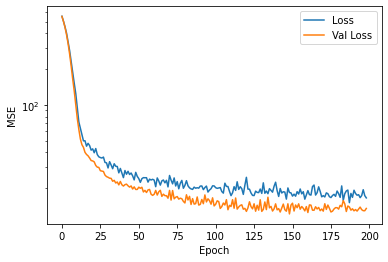

In [7]:
training_history_standard = pd.DataFrame.from_dict(history_standard.history)

plt.plot(training_history_standard.index.values, training_history_standard["loss"].values, label="Loss")
plt.plot(training_history_standard.index.values, training_history_standard["val_loss"].values, label="Val Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.yscale("log")
plt.show()

Results:

Mean squared error: 12.174670745713467
R2 score: 0.8537469018768679


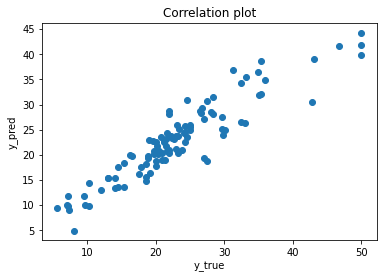

In [8]:
y_test_pred = standard_model.predict(x_test)

print("Mean squared error:", mean_squared_error(y_test, y_test_pred))
print("R2 score:", r2_score(y_test, y_test_pred))

plt.title("Correlation plot")
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.scatter(y_test, y_test_pred)
plt.show()

## Build and train regression model using negative log-likelihood loss

Define negative log-likelihood loss function and mean squared error metric suitable for a regression network with two outputs, where `y_pred[:, 0]` contains the mean values and `y_pred[:, 1]` the logarithm of the variances of the predicted Gaussian distributions.

In [9]:
class NegativeLogLikelihoodLoss(tf.keras.losses.Loss):
    def __init__(self, reduction=tf.keras.losses.Reduction.AUTO, name="negative_log_likelihood"):
        self.mse = tf.keras.losses.MeanSquaredError()
        super().__init__(reduction, name)

    def __call__(self, y_true, y_pred, sample_weight=None):
        mu = y_pred[:, 0]
        log_var = y_pred[:, 1]
        var = tf.exp(log_var)
        mse = self.mse(y_true, mu, sample_weight)
        
        var_contribution = 0.5 * log_var
        
        if sample_weight:
            var_contribution *= sample_weight
            
        error_term = 0.5 * mse / var
        
        return var_contribution + error_term
    
    
class AdaptedMeanSquaredError(tf.keras.metrics.MeanSquaredError):
    def __init__(self, name='adapted_mean_squared_error', dtype=None):
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        mu = y_pred[:, 0]
        super().update_state(y_true, mu, sample_weight)

Define and train model:

In [10]:
def build_uncertainty_estimating_regression_model(use_mc_dropout=False):
    units_per_layer = 15
    dropout_rate = 0.1
    num_layers = 1
    
    inputs = tf.keras.Input(shape=(x_train.shape[-1],))
    x = inputs
    
    for i in range(num_layers):
        x = layers.Dense(units_per_layer, activation='tanh')(x)
        x = layers.Dropout(dropout_rate)(x, training=use_mc_dropout)

    regression_output = layers.Dense(1, activation=None)(x)
    log_var = layers.Dense(1, activation=None)(x)
    
    concatenated_outputs = layers.Concatenate()([regression_output, log_var])
    
    return tf.keras.Model(inputs=inputs, outputs=concatenated_outputs)

better_model = build_uncertainty_estimating_regression_model(use_mc_dropout=False)

better_model.compile(loss=NegativeLogLikelihoodLoss(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
                     metrics=AdaptedMeanSquaredError()
                    )

history_better = better_model.fit(
    x=x_train,
    y=y_train,
    epochs=1000,
    callbacks=callback_factory(),
    validation_data=(x_test, y_test)
)

Epoch 1/1000
13/13 [==============================] - 0s 9ms/step - loss: 325.2818 - adapted_mean_squared_error: 598.5911 - val_loss: 187.1211 - val_adapted_mean_squared_error: 700.0486
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 174.8846 - adapted_mean_squared_error: 625.9425 - val_loss: 107.8083 - val_adapted_mean_squared_error: 686.0111
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 90.6536 - adapted_mean_squared_error: 566.1666 - val_loss: 60.6498 - val_adapted_mean_squared_error: 670.4310
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 49.2718 - adapted_mean_squared_error: 527.3666 - val_loss: 34.6391 - val_adapted_mean_squared_error: 653.9880
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 38.1381 - adapted_mean_squared_error: 620.9993 - val_loss: 20.2587 - val_adapted_mean_squared_error: 635.6291
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 19

Epoch 46/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.4780 - adapted_mean_squared_error: 375.7710 - val_loss: 3.5021 - val_adapted_mean_squared_error: 466.4907
Epoch 47/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.4916 - adapted_mean_squared_error: 385.4368 - val_loss: 3.4988 - val_adapted_mean_squared_error: 464.1422
Epoch 48/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.5280 - adapted_mean_squared_error: 406.8758 - val_loss: 3.4957 - val_adapted_mean_squared_error: 461.7914
Epoch 49/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.4695 - adapted_mean_squared_error: 370.4224 - val_loss: 3.4927 - val_adapted_mean_squared_error: 459.4579
Epoch 50/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.4929 - adapted_mean_squared_error: 386.2828 - val_loss: 3.4898 - val_adapted_mean_squared_error: 457.1663
Epoch 51/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.4741 - a

Epoch 91/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.3274 - adapted_mean_squared_error: 279.9587 - val_loss: 3.3446 - val_adapted_mean_squared_error: 349.1273
Epoch 92/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.3109 - adapted_mean_squared_error: 268.0036 - val_loss: 3.3399 - val_adapted_mean_squared_error: 346.1323
Epoch 93/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.3347 - adapted_mean_squared_error: 281.8517 - val_loss: 3.3350 - val_adapted_mean_squared_error: 342.9702
Epoch 94/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.2835 - adapted_mean_squared_error: 251.7847 - val_loss: 3.3300 - val_adapted_mean_squared_error: 339.8376
Epoch 95/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.2963 - adapted_mean_squared_error: 260.4465 - val_loss: 3.3250 - val_adapted_mean_squared_error: 336.6467
Epoch 96/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.2931 - a

13/13 [==============================] - 0s 3ms/step - loss: 3.0881 - adapted_mean_squared_error: 171.8591 - val_loss: 3.0233 - val_adapted_mean_squared_error: 191.6293
Epoch 136/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0302 - adapted_mean_squared_error: 150.4198 - val_loss: 3.0122 - val_adapted_mean_squared_error: 187.7523
Epoch 137/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.9949 - adapted_mean_squared_error: 140.2804 - val_loss: 3.0009 - val_adapted_mean_squared_error: 183.8935
Epoch 138/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.9746 - adapted_mean_squared_error: 135.4269 - val_loss: 2.9890 - val_adapted_mean_squared_error: 179.9560
Epoch 139/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.9701 - adapted_mean_squared_error: 133.5821 - val_loss: 2.9768 - val_adapted_mean_squared_error: 175.7355
Epoch 140/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.9230 - adapted_me

Epoch 180/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3154 - adapted_mean_squared_error: 35.3566 - val_loss: 2.2888 - val_adapted_mean_squared_error: 45.9738
Epoch 181/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3179 - adapted_mean_squared_error: 35.4026 - val_loss: 2.2798 - val_adapted_mean_squared_error: 45.0464
Epoch 182/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3453 - adapted_mean_squared_error: 38.2473 - val_loss: 2.2646 - val_adapted_mean_squared_error: 43.7338
Epoch 183/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3343 - adapted_mean_squared_error: 37.0490 - val_loss: 2.2529 - val_adapted_mean_squared_error: 42.5666
Epoch 184/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.2364 - adapted_mean_squared_error: 29.8188 - val_loss: 2.2459 - val_adapted_mean_squared_error: 42.1125
Epoch 185/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.2873 - adapt

13/13 [==============================] - 0s 3ms/step - loss: 2.0029 - adapted_mean_squared_error: 19.3382 - val_loss: 2.0106 - val_adapted_mean_squared_error: 26.1224
Epoch 226/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0058 - adapted_mean_squared_error: 19.4650 - val_loss: 1.9819 - val_adapted_mean_squared_error: 25.2098
Epoch 227/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.9796 - adapted_mean_squared_error: 18.4347 - val_loss: 1.9848 - val_adapted_mean_squared_error: 25.1919
Epoch 228/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0072 - adapted_mean_squared_error: 19.9127 - val_loss: 1.9867 - val_adapted_mean_squared_error: 25.1164
Epoch 229/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.9841 - adapted_mean_squared_error: 18.7100 - val_loss: 1.9750 - val_adapted_mean_squared_error: 24.6150
Epoch 230/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.9923 - adapted_mean_squared

13/13 [==============================] - 0s 3ms/step - loss: 1.8702 - adapted_mean_squared_error: 15.0601 - val_loss: 1.9307 - val_adapted_mean_squared_error: 21.2506
Epoch 271/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.7638 - adapted_mean_squared_error: 12.2592 - val_loss: 1.9029 - val_adapted_mean_squared_error: 20.8820
Epoch 272/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.7518 - adapted_mean_squared_error: 11.7156 - val_loss: 1.9419 - val_adapted_mean_squared_error: 21.4598
Epoch 273/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.7530 - adapted_mean_squared_error: 11.9630 - val_loss: 1.8951 - val_adapted_mean_squared_error: 20.6673
Epoch 274/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.7254 - adapted_mean_squared_error: 11.0554 - val_loss: 1.9755 - val_adapted_mean_squared_error: 22.1753
Epoch 275/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.7642 - adapted_mean_squared

13/13 [==============================] - 0s 3ms/step - loss: 1.6718 - adapted_mean_squared_error: 10.1190 - val_loss: 2.0288 - val_adapted_mean_squared_error: 21.9595
Epoch 316/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.6546 - adapted_mean_squared_error: 9.7764 - val_loss: 1.9866 - val_adapted_mean_squared_error: 21.6161
Epoch 317/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.6309 - adapted_mean_squared_error: 9.4274 - val_loss: 1.9986 - val_adapted_mean_squared_error: 21.3929
Epoch 318/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.5755 - adapted_mean_squared_error: 8.4425 - val_loss: 2.0123 - val_adapted_mean_squared_error: 21.5379
Epoch 319/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.6114 - adapted_mean_squared_error: 9.1253 - val_loss: 1.9932 - val_adapted_mean_squared_error: 21.4258
Epoch 320/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.6943 - adapted_mean_squared_err

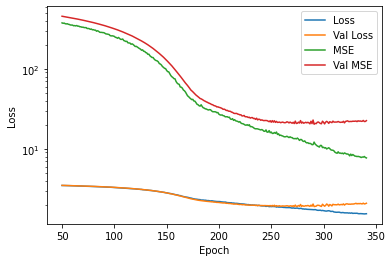

In [11]:
training_history_better = pd.DataFrame.from_dict(history_better.history)

training_history_better = training_history_better[50:]

plt.plot(training_history_better.index.values, training_history_better["loss"].values, label="Loss")
plt.plot(training_history_better.index.values, training_history_better["val_loss"].values, label="Val Loss")
plt.plot(training_history_better.index.values, training_history_better["adapted_mean_squared_error"].values,  label="MSE")
plt.plot(training_history_better.index.values, training_history_better["val_adapted_mean_squared_error"].values, label="Val MSE")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

Mean squared error: 16.16427719664345
R2 score: 0.8058201598788567


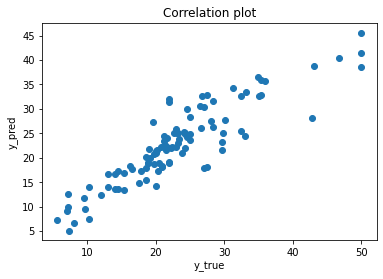

In [12]:
y_test_pred_better = better_model.predict(x_test)

print("Mean squared error:", mean_squared_error(y_test, y_test_pred_better[:, 0]))
print("R2 score:", r2_score(y_test, y_test_pred_better[:, 0]))

plt.title("Correlation plot")
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.scatter(y_test, y_test_pred_better[:, 0])
plt.show()

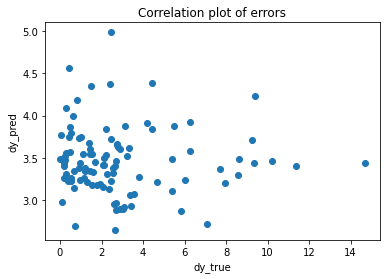

R2 score for errors: -0.07429241190658775


In [13]:
y_errors_better = np.abs(y_test_pred_better[:, 0] - y_test)
y_test_pred_better_std = np.sqrt(np.exp(y_test_pred_better[:, 1]))
y_errors_better_scaled = y_errors_better / y_test_pred_better_std

plt.title("Correlation plot of errors")
plt.xlabel("dy_true")
plt.ylabel("dy_pred")
plt.scatter(y_errors_better, np.sqrt(np.exp(y_test_pred_better[:, 1])))
plt.show()

print("R2 score for errors:", r2_score(y_errors_better, y_test_pred_better_std))

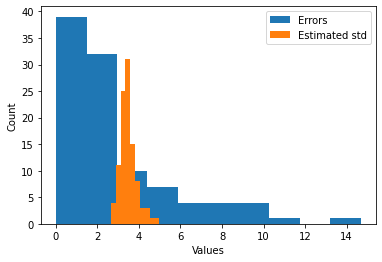

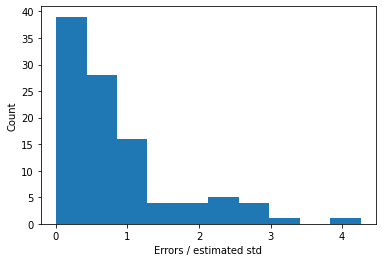

0.8408578438048347


In [14]:
plt.hist(y_errors_better, label="Errors")
plt.hist(y_test_pred_better_std, label="Estimated std")
plt.legend()
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()

plt.hist(y_errors_better_scaled)
plt.xlabel("Errors / estimated std")
plt.ylabel("Count")
plt.show()

print(np.mean(y_errors_better_scaled))

## Build and train regression model using negative log-likelihood loss and Monte-Carlo dropout

In [15]:
better_model_mc_dropout = build_uncertainty_estimating_regression_model(use_mc_dropout=True)

better_model_mc_dropout.compile(loss=NegativeLogLikelihoodLoss(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
                     metrics=AdaptedMeanSquaredError()
                    )

history_mc_dropout = better_model_mc_dropout.fit(
    x=x_train,
    y=y_train,
    epochs=1000,
    callbacks=callback_factory(),
    validation_data=(x_test, y_test)
)

Epoch 1/1000
13/13 [==============================] - 0s 9ms/step - loss: 278.5356 - adapted_mean_squared_error: 565.8208 - val_loss: 178.6785 - val_adapted_mean_squared_error: 691.0314
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 161.8146 - adapted_mean_squared_error: 586.1347 - val_loss: 102.8110 - val_adapted_mean_squared_error: 668.3212
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 88.6819 - adapted_mean_squared_error: 584.9022 - val_loss: 58.5417 - val_adapted_mean_squared_error: 652.3197
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 59.1674 - adapted_mean_squared_error: 567.3466 - val_loss: 35.6674 - val_adapted_mean_squared_error: 635.2806
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 28.9461 - adapted_mean_squared_error: 525.0025 - val_loss: 24.2994 - val_adapted_mean_squared_error: 617.0519
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 20

Epoch 46/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.4933 - adapted_mean_squared_error: 305.2324 - val_loss: 3.5275 - val_adapted_mean_squared_error: 412.8813
Epoch 47/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.5690 - adapted_mean_squared_error: 365.4439 - val_loss: 3.5588 - val_adapted_mean_squared_error: 415.3650
Epoch 48/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.5273 - adapted_mean_squared_error: 329.2050 - val_loss: 3.5020 - val_adapted_mean_squared_error: 407.7142
Epoch 49/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.4645 - adapted_mean_squared_error: 296.8049 - val_loss: 3.5118 - val_adapted_mean_squared_error: 403.2181
Epoch 50/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.5097 - adapted_mean_squared_error: 323.5378 - val_loss: 3.5152 - val_adapted_mean_squared_error: 403.7328
Epoch 51/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.4429 - a

Epoch 91/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.3439 - adapted_mean_squared_error: 242.0599 - val_loss: 3.3694 - val_adapted_mean_squared_error: 303.3166
Epoch 92/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.3041 - adapted_mean_squared_error: 223.2774 - val_loss: 3.3402 - val_adapted_mean_squared_error: 294.7450
Epoch 93/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.2804 - adapted_mean_squared_error: 205.7905 - val_loss: 3.3287 - val_adapted_mean_squared_error: 306.1670
Epoch 94/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.3884 - adapted_mean_squared_error: 246.9096 - val_loss: 3.3112 - val_adapted_mean_squared_error: 288.4727
Epoch 95/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.2883 - adapted_mean_squared_error: 213.3335 - val_loss: 3.3350 - val_adapted_mean_squared_error: 294.0934
Epoch 96/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.2969 - a

13/13 [==============================] - 0s 3ms/step - loss: 3.0630 - adapted_mean_squared_error: 131.0958 - val_loss: 2.9946 - val_adapted_mean_squared_error: 149.3751
Epoch 136/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.9285 - adapted_mean_squared_error: 104.6781 - val_loss: 2.9872 - val_adapted_mean_squared_error: 172.5058
Epoch 137/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.9283 - adapted_mean_squared_error: 104.1179 - val_loss: 3.0062 - val_adapted_mean_squared_error: 156.5419
Epoch 138/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0292 - adapted_mean_squared_error: 123.6520 - val_loss: 2.9325 - val_adapted_mean_squared_error: 164.5929
Epoch 139/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0045 - adapted_mean_squared_error: 118.7196 - val_loss: 2.9514 - val_adapted_mean_squared_error: 160.4840
Epoch 140/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.8945 - adapted_me

Epoch 180/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.4982 - adapted_mean_squared_error: 46.8466 - val_loss: 2.4660 - val_adapted_mean_squared_error: 59.2874
Epoch 181/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.5274 - adapted_mean_squared_error: 50.3050 - val_loss: 2.5459 - val_adapted_mean_squared_error: 58.2701
Epoch 182/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.4830 - adapted_mean_squared_error: 44.7772 - val_loss: 2.5089 - val_adapted_mean_squared_error: 57.0538
Epoch 183/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3442 - adapted_mean_squared_error: 32.8356 - val_loss: 2.5075 - val_adapted_mean_squared_error: 60.1386
Epoch 184/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.4525 - adapted_mean_squared_error: 41.7086 - val_loss: 2.4801 - val_adapted_mean_squared_error: 57.3915
Epoch 185/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.5642 - adapt

13/13 [==============================] - 0s 3ms/step - loss: 2.2876 - adapted_mean_squared_error: 32.0115 - val_loss: 2.2598 - val_adapted_mean_squared_error: 40.7855
Epoch 226/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3022 - adapted_mean_squared_error: 32.8942 - val_loss: 2.2293 - val_adapted_mean_squared_error: 29.6958
Epoch 227/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.2387 - adapted_mean_squared_error: 28.8767 - val_loss: 2.2692 - val_adapted_mean_squared_error: 34.0399
Epoch 228/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.4412 - adapted_mean_squared_error: 40.2270 - val_loss: 2.1710 - val_adapted_mean_squared_error: 40.0673
Epoch 229/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1917 - adapted_mean_squared_error: 25.8106 - val_loss: 2.1780 - val_adapted_mean_squared_error: 33.7602
Epoch 230/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3573 - adapted_mean_squared

13/13 [==============================] - 0s 3ms/step - loss: 2.0668 - adapted_mean_squared_error: 20.5656 - val_loss: 2.2203 - val_adapted_mean_squared_error: 32.5580
Epoch 271/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0964 - adapted_mean_squared_error: 22.6895 - val_loss: 2.1305 - val_adapted_mean_squared_error: 24.6494
Epoch 272/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1297 - adapted_mean_squared_error: 24.2394 - val_loss: 2.1247 - val_adapted_mean_squared_error: 25.1704
Epoch 273/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1571 - adapted_mean_squared_error: 25.0371 - val_loss: 2.1422 - val_adapted_mean_squared_error: 26.9251
Epoch 274/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1764 - adapted_mean_squared_error: 25.1764 - val_loss: 2.2402 - val_adapted_mean_squared_error: 26.6982
Epoch 275/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0028 - adapted_mean_squared

13/13 [==============================] - 0s 3ms/step - loss: 2.1109 - adapted_mean_squared_error: 23.0062 - val_loss: 2.1290 - val_adapted_mean_squared_error: 26.2336
Epoch 316/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1245 - adapted_mean_squared_error: 23.9270 - val_loss: 2.1712 - val_adapted_mean_squared_error: 33.1237
Epoch 317/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1091 - adapted_mean_squared_error: 22.5484 - val_loss: 2.0632 - val_adapted_mean_squared_error: 24.4933
Epoch 318/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0925 - adapted_mean_squared_error: 21.9183 - val_loss: 2.2479 - val_adapted_mean_squared_error: 37.9905
Epoch 319/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0299 - adapted_mean_squared_error: 19.3930 - val_loss: 2.2622 - val_adapted_mean_squared_error: 36.9107
Epoch 320/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1408 - adapted_mean_squared

13/13 [==============================] - 0s 3ms/step - loss: 2.0772 - adapted_mean_squared_error: 21.5165 - val_loss: 2.2623 - val_adapted_mean_squared_error: 45.4568
Epoch 361/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0523 - adapted_mean_squared_error: 20.6416 - val_loss: 2.1211 - val_adapted_mean_squared_error: 25.7518
Epoch 362/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1202 - adapted_mean_squared_error: 22.2974 - val_loss: 2.1351 - val_adapted_mean_squared_error: 33.8638
Epoch 363/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1245 - adapted_mean_squared_error: 23.4758 - val_loss: 2.3112 - val_adapted_mean_squared_error: 32.9046
Epoch 364/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.9925 - adapted_mean_squared_error: 18.2800 - val_loss: 2.1980 - val_adapted_mean_squared_error: 37.9680
Epoch 365/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1527 - adapted_mean_squared

13/13 [==============================] - 0s 3ms/step - loss: 2.0364 - adapted_mean_squared_error: 20.1355 - val_loss: 2.3891 - val_adapted_mean_squared_error: 45.2337
Epoch 406/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0754 - adapted_mean_squared_error: 21.5246 - val_loss: 2.0632 - val_adapted_mean_squared_error: 28.7961
Epoch 407/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.0332 - adapted_mean_squared_error: 19.5587 - val_loss: 2.2047 - val_adapted_mean_squared_error: 33.5925
Epoch 408/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1427 - adapted_mean_squared_error: 24.2178 - val_loss: 2.3353 - val_adapted_mean_squared_error: 37.4894
Epoch 409/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1433 - adapted_mean_squared_error: 23.8221 - val_loss: 2.3356 - val_adapted_mean_squared_error: 30.6051
Epoch 410/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1706 - adapted_mean_squared

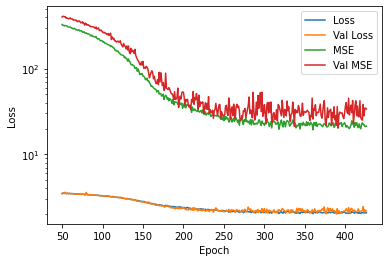

In [16]:
training_history_mc_dropout = pd.DataFrame.from_dict(history_mc_dropout.history)

training_history_mc_dropout = training_history_mc_dropout[50:]

plt.plot(training_history_mc_dropout.index.values, training_history_mc_dropout["loss"].values, label="Loss")
plt.plot(training_history_mc_dropout.index.values, training_history_mc_dropout["val_loss"].values, label="Val Loss")
plt.plot(training_history_mc_dropout.index.values, training_history_mc_dropout["adapted_mean_squared_error"].values,  label="MSE")
plt.plot(training_history_mc_dropout.index.values, training_history_mc_dropout["val_adapted_mean_squared_error"].values, label="Val MSE")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

Evaluate model similar to this [blog post](https://www.inovex.de/de/blog/uncertainty-quantification-deep-learning/), computing the mean and variance for each sample from the test set.

In [17]:
mc_samples = 5

y_test_pred_mc = []

for _ in range(mc_samples):
    result = better_model_mc_dropout.predict(x_test)
    
    y_test_pred_mc.append(result)
    
y_test_pred_mc = np.stack(y_test_pred_mc)

In [18]:
# Compute mean predicted values:
y_test_pred_mc_mean = np.mean(y_test_pred_mc[:, :, 0], axis=0)

# Estimate aleatoric and epistemic uncertainties as suggested here: https://www.inovex.de/de/blog/uncertainty-quantification-deep-learning/
y_test_pred_mc_var_aleatoric = np.mean(np.exp(y_test_pred_mc[:, :, 1]), axis=0)

y_test_pred_mc_var_epistemic = np.var(y_test_pred_mc[:, :, 0], axis=0)
y_test_pred_mc_var = y_test_pred_mc_var_aleatoric + y_test_pred_mc_var_epistemic
y_test_pred_mc_std = np.sqrt(y_test_pred_mc_var)

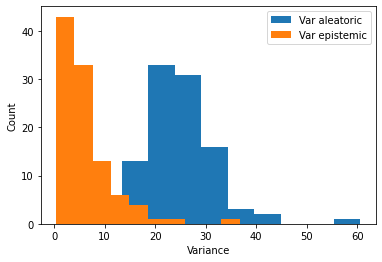

In [19]:
plt.hist(y_test_pred_mc_var_aleatoric, label="Var aleatoric")
plt.hist(y_test_pred_mc_var_epistemic, label="Var epistemic")
plt.xlabel("Variance")
plt.ylabel("Count")
plt.legend()
plt.show()

Mean squared error: 21.494334409481233
R2 score: 0.7417907173721231


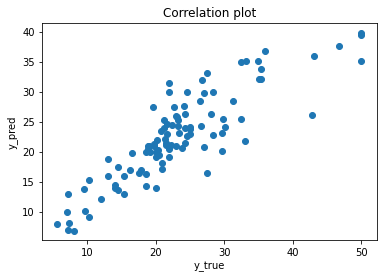

In [20]:
print("Mean squared error:", mean_squared_error(y_test, y_test_pred_mc_mean))
print("R2 score:", r2_score(y_test, y_test_pred_mc_mean))

plt.title("Correlation plot")
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.scatter(y_test, y_test_pred_mc_mean)
plt.show()

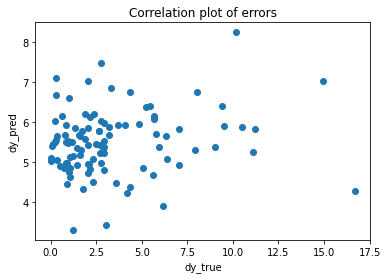

R2 score for errors: -0.4298202547197145


In [21]:
y_errors_mc = np.abs(y_test_pred_mc_mean - y_test)
y_errors_mc_scaled = y_errors_mc / y_test_pred_mc_std

plt.title("Correlation plot of errors")
plt.xlabel("dy_true")
plt.ylabel("dy_pred")
plt.scatter(y_errors_mc, y_test_pred_mc_std)
plt.show()

print("R2 score for errors:", r2_score(y_errors_mc, y_test_pred_mc_std))

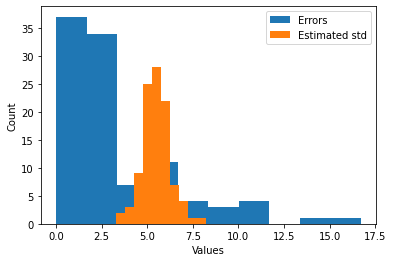

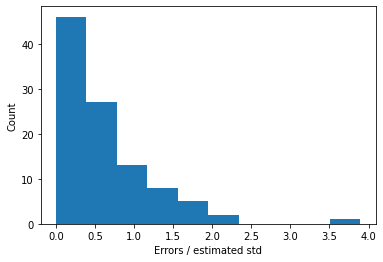

0.6100223862948077


In [22]:
plt.hist(y_errors_mc, label="Errors")
plt.hist(y_test_pred_mc_std, label="Estimated std")
plt.legend()
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()

plt.hist(y_errors_mc_scaled)
plt.xlabel("Errors / estimated std")
plt.ylabel("Count")
plt.show()

print(np.mean(y_errors_mc_scaled))

## Results

Here are some results of the different approaches:

* Standard model trained with MSE loss:

    * Mean squared error: 12.174670745713467
    * R2 score: 0.8537469018768679

* Model trained with NLL loss for uncertainty estimation, but without MC dropout sampling:

    * Mean squared error: 16.16427719664345
    * R2 score: 0.8058201598788567
    
* Model trained with NLL loss for uncertainty estimation, and with MC dropout sampling during inference using 5 samples:

    * Mean squared error: 21.494334409481233
    * R2 score: 0.7417907173721231
    
Note that they were obtained without any tuning of the models! The hyperparameters were set in such a way that the impact of different loss functions for training and dropout procedures is visible. By themselves, the results from using NLL loss with or without MC dropout do not look promising. However, they could be improved by better tuning of hyperparameters, which is not the focus of this notebook.

The model trained with MSE loss yields the smallest test error. Reducing the number of units in the fully connected layer of that model from 15 to 10 and removing the dropout layer actually reduces the MSE test error to 11. Training a model with the same architecture using negative log-likelihood loss instead of MSE loss, the MSE on the test set increases slightly, but now the model can estimate the aleatoric uncertainty (i.e. the uncertainty due to noise in the data). Activating dropout for the same model during inference, the MSE on the test set again rises slightly, but now the model can estimate the aleatoric uncertainty and the epistemic uncertainty (i.e. the model uncertainty). 

For both models that allow uncertainty estimation, the R2 score between the actual error and the estimated standard deviation is negative, which suggests that the variation in the errors is not well explained by the model. However, looking at the errors normalized by the estimated standard deviations, for the model using Monte-Carlo dropout, the ratios are more often below two and the average of the ratios is smaller than without Monte-Carlo dropout. This indicates that the errors may nevertheless be correlated with the estimated variances.